In [1]:
from pandas import read_csv
from seaborn import pairplot, heatmap
from matplotlib import pyplot as plt

In [2]:
data = read_csv("data/preprocessed_data.csv")

In [3]:
data.head(3)

,Unnamed: 0,trigger_ts_utc,measured_value,ns,machine,errection_location,installation_location,components,sensor_type
0,0,2024-10-31 01:14:50.846157+00:00,30944.000000,5,==0192E0020=C03DR3,NaN,NaN,NaN,DataPublishTrigger
1,1,2024-10-31 12:51:52.139911+00:00,0.004774,5,==0192E0020=C03DR3,++ST000,+AP002,-BF02,ConsumptionWater
2,2,2024-10-31 12:51:52.139911+00:00,3.647569,5,==0192E0020=C03DR3,++ST000,+AZ001,-BF01,ConsumptionWater


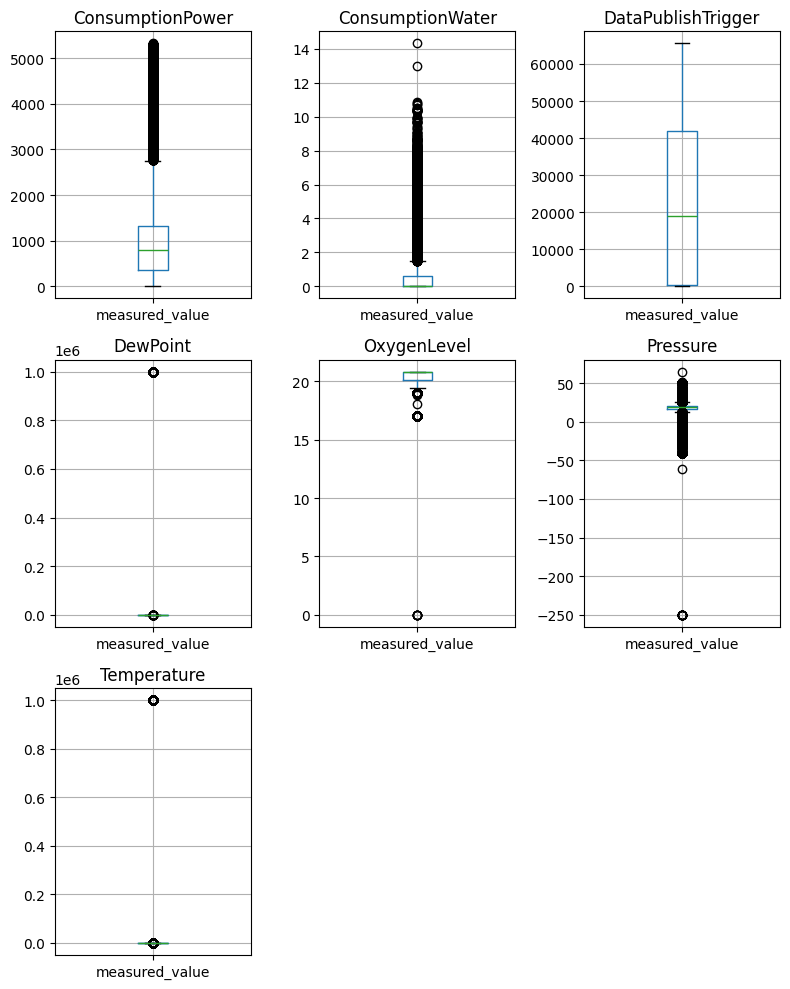

In [4]:
group = data.groupby("sensor_type")
group.boxplot(figsize=(8, 10), column="measured_value", sharey=False, subplots=True)
plt.tight_layout()
plt.show()

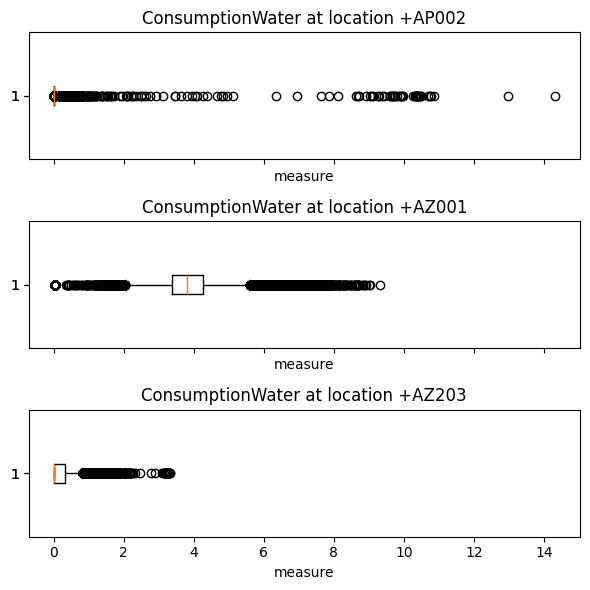

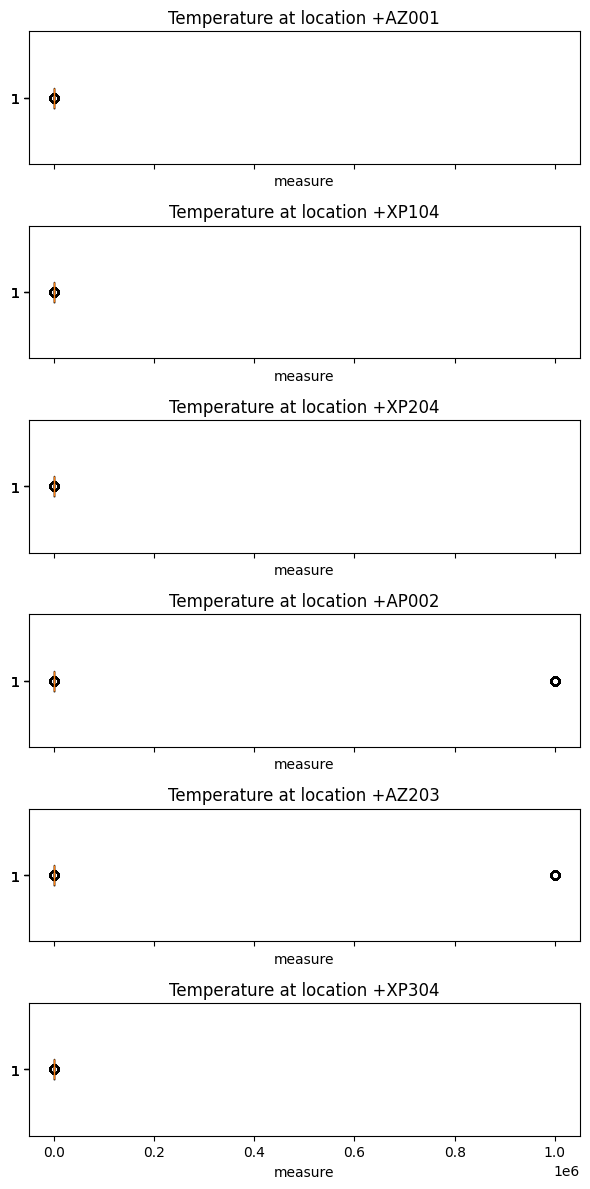

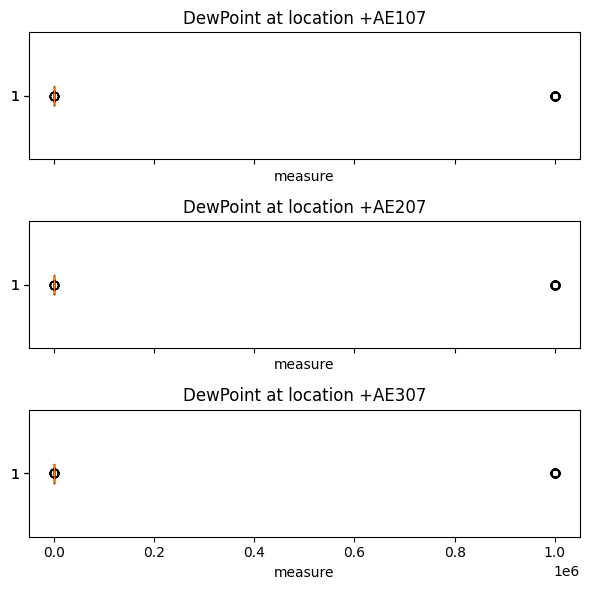

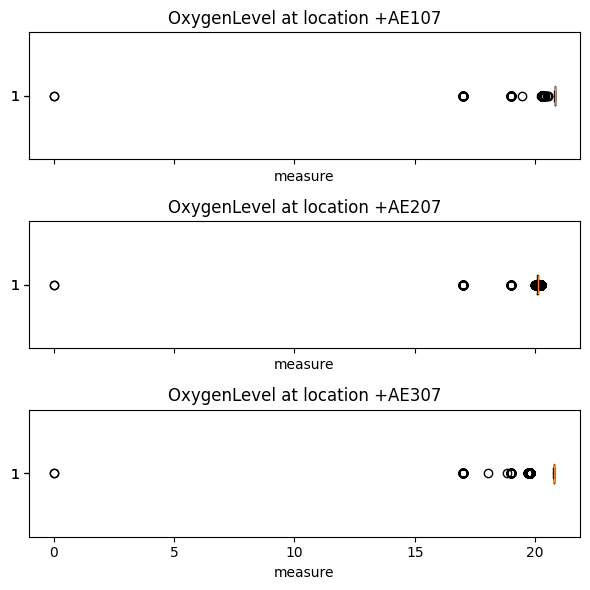

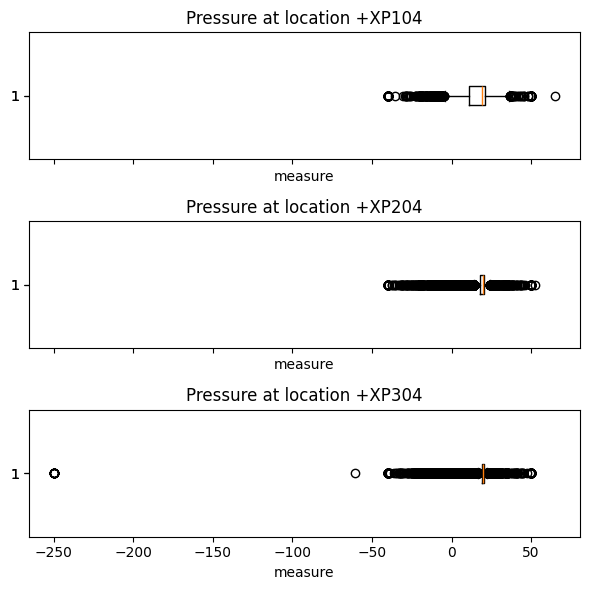

In [35]:
for channel in data.sensor_type.unique():
    _data = data.loc[data.sensor_type==channel]
    n = len(_data["installation_location"].unique())
    if n > 1:
        i = 0
        fig, ax = plt.subplots(ncols=1, nrows=n, figsize=(6,2*n), sharex=True, sharey=True)
        for location in _data["installation_location"].unique():
            try:
                __data = _data.loc[_data["installation_location"]==location]

                ax[i].boxplot(__data.measured_value, vert=False)
                ax[i].set_title(f"{channel} at location {location}")
                ax[i].set_ylabel("")
                ax[i].set_xlabel("measure")

            except:
                continue
            i+=1
        plt.tight_layout()
        plt.savefig(f"img/Boxplot_{channel}.png")
    else:
        continue

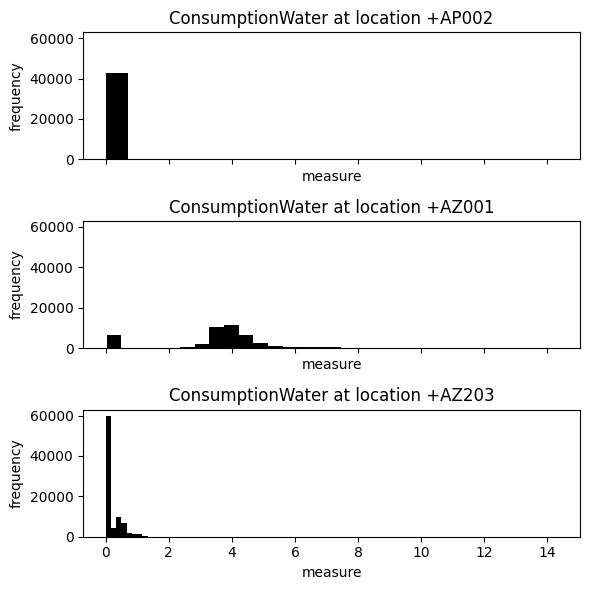

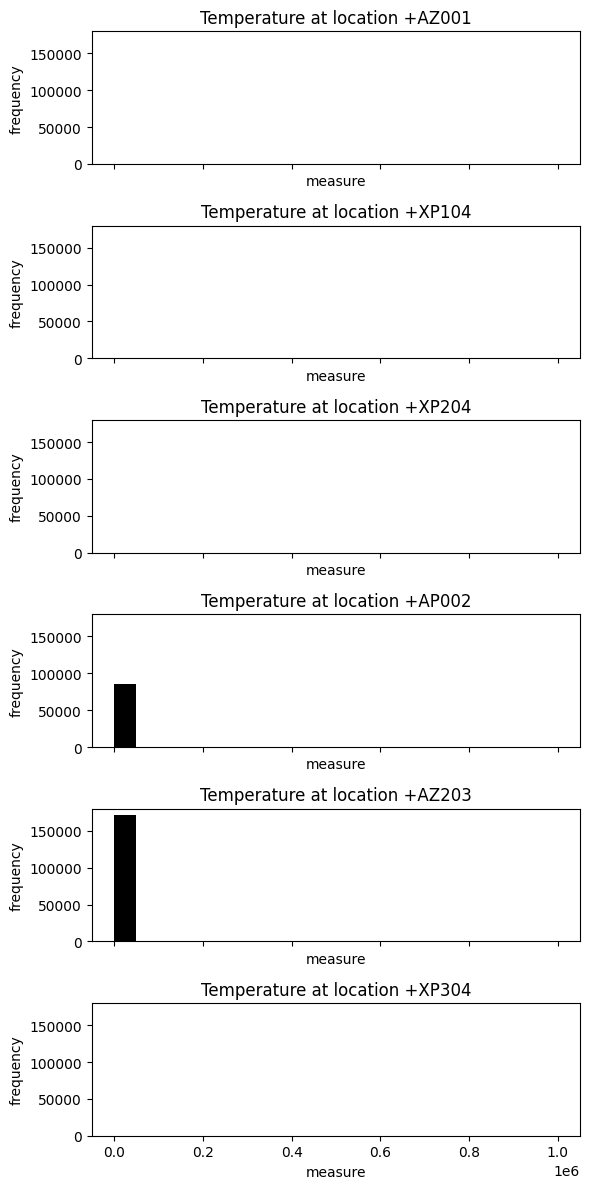

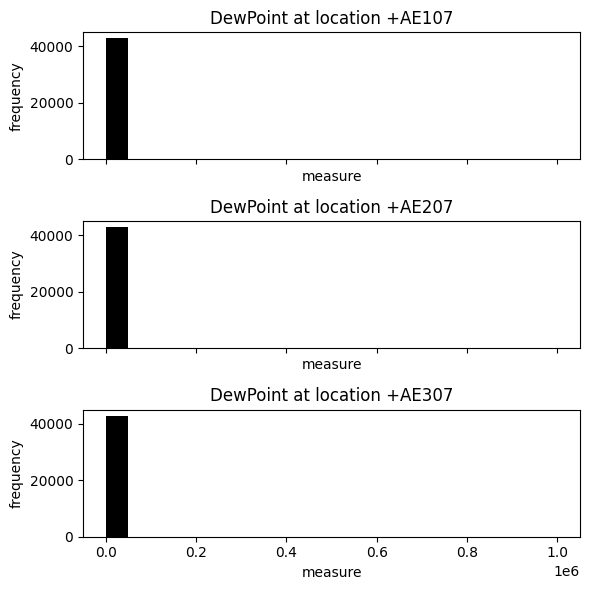

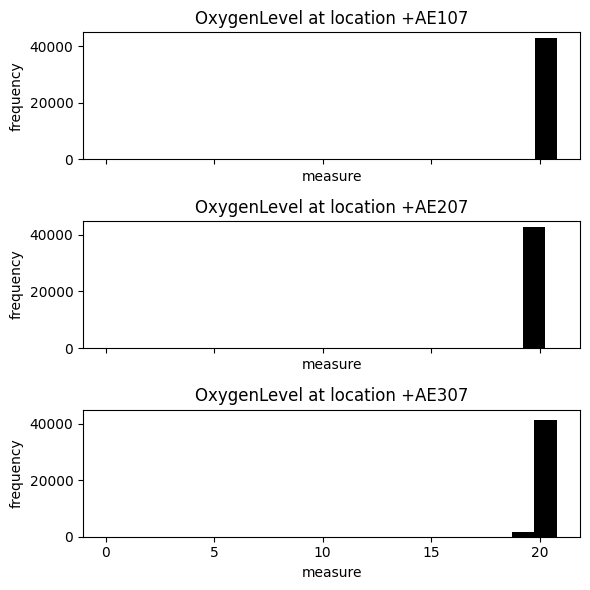

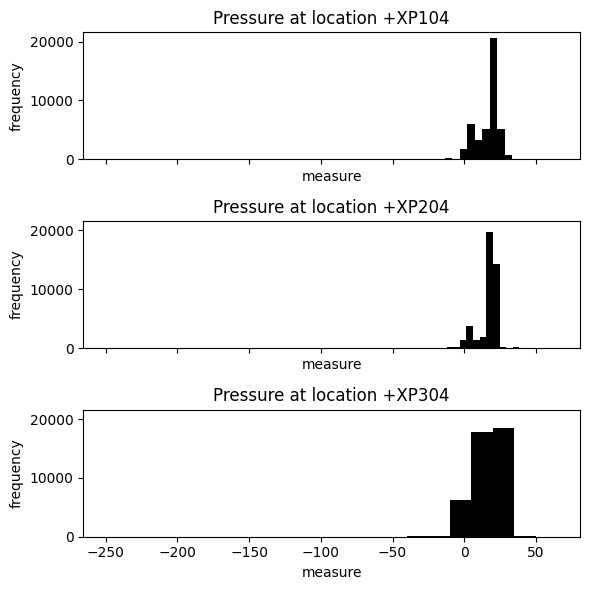

In [34]:
for channel in data.sensor_type.unique():
    _data = data.loc[data.sensor_type==channel]
    n = len(_data["installation_location"].unique())
    if n > 1:
        i = 0
        fig, ax = plt.subplots(ncols=1, nrows=n, figsize=(6,2*n), sharex=True, sharey=True)
        for location in _data["installation_location"].unique():
            try:
                __data = _data.loc[_data["installation_location"]==location]

                ax[i].hist(__data.measured_value, color="k", bins=20)
                ax[i].set_title(f"{channel} at location {location}")
                ax[i].set_ylabel("frequency")
                ax[i].set_xlabel("measure")

            except:
                continue
            i+=1
        plt.tight_layout()
        plt.savefig(f"img/Histogram_{channel}.png")
    else:
        continue

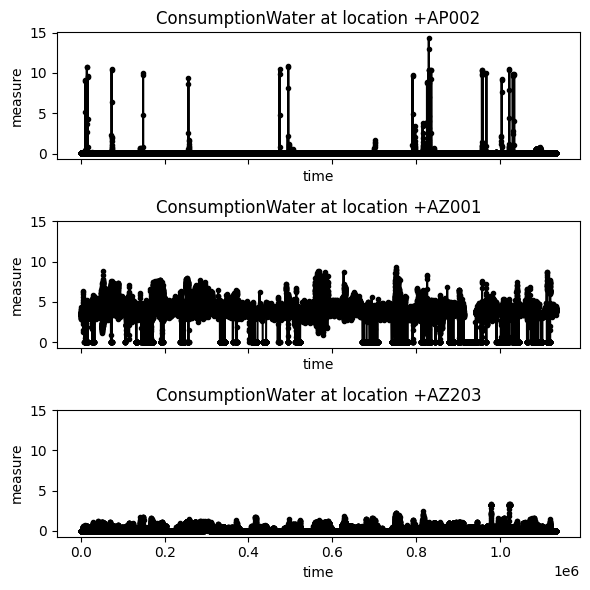

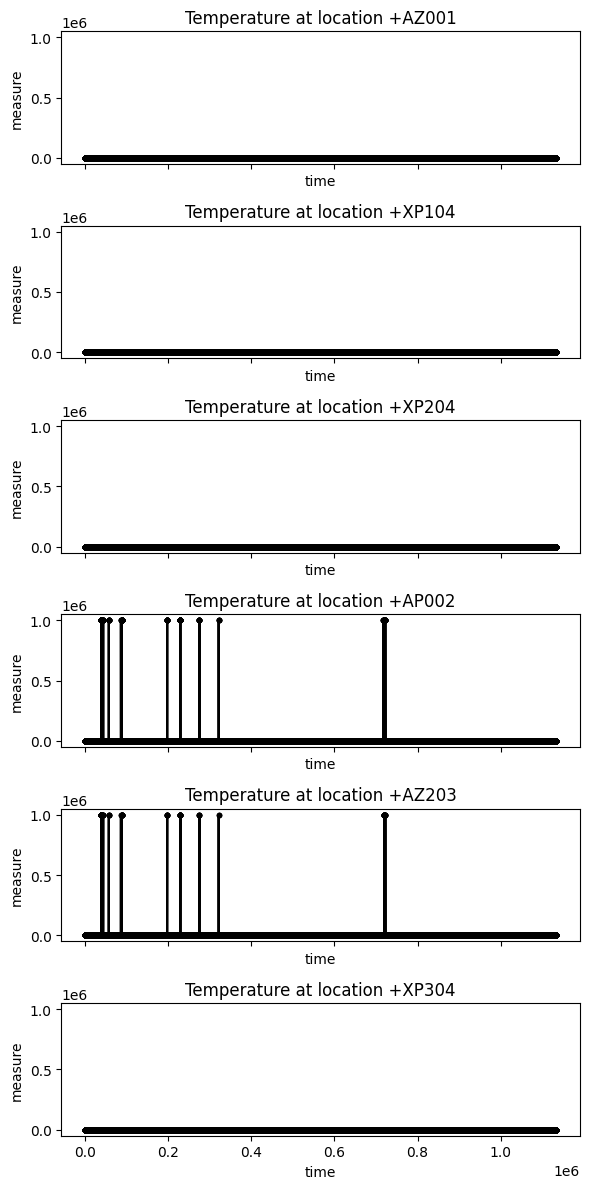

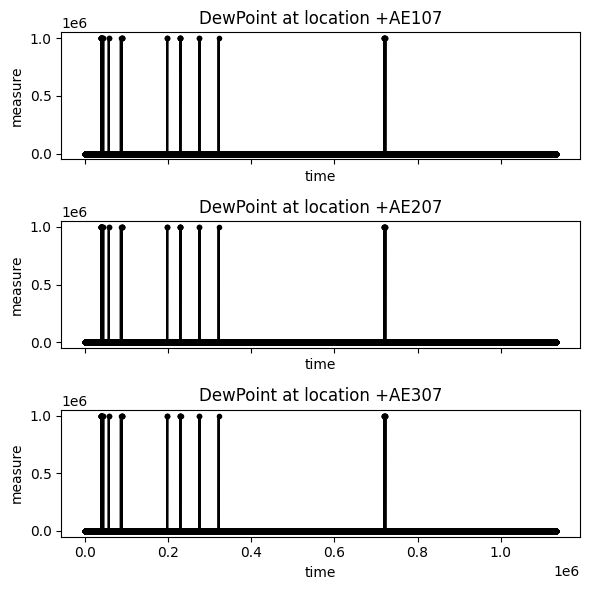

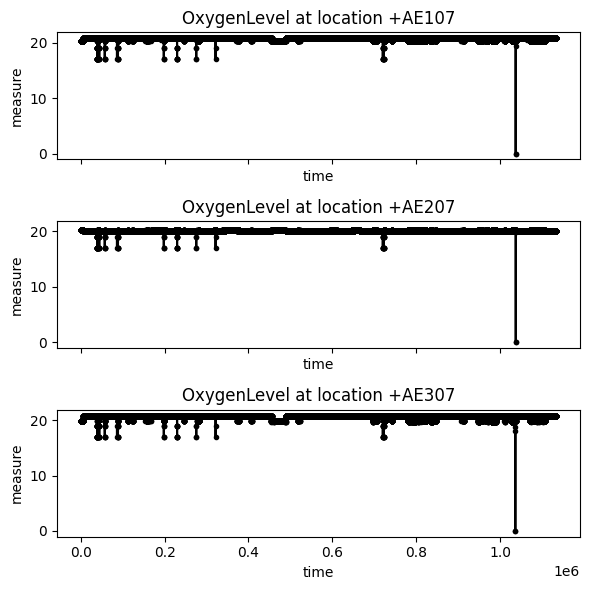

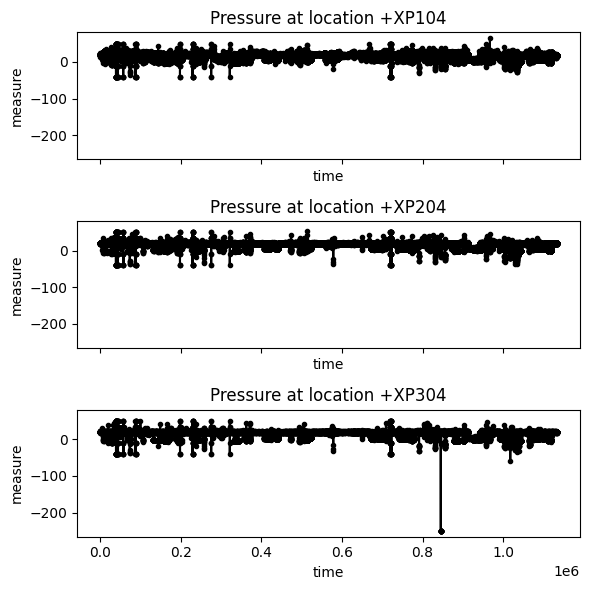

In [33]:
for channel in data.sensor_type.unique():
    _data = data.loc[data.sensor_type==channel]
    n = len(_data["installation_location"].unique())
    if n > 1:
        i = 0
        fig, ax = plt.subplots(ncols=1, nrows=n, figsize=(6,2*n), sharex=True, sharey=True)
        for location in _data["installation_location"].unique():
            try:
                __data = _data.loc[_data["installation_location"]==location]

                ax[i].plot(__data.measured_value, ".-", color="k", label=f"inst_loc={location}")
                ax[i].set_title(f"{channel} at location {location}")
                ax[i].set_ylabel("measure")
                ax[i].set_xlabel("time")

            except:
                continue
            i+=1
        plt.tight_layout()
        plt.savefig(f"img/Lineplot_{channel}.png")
    else:
        continue